**ProyectoDS_ParteII** - Gerson Molina

----------

**1-OBJETIVO:**


Pronosticar la evolución de las ventas en función del tiempo (meses).

**2-CONTEXTO COMERCIAL:** 

Nos enfocaremos en preveer las ventas de indumentaria en el mercado Indio a través de la venta en línea de Amazon, teniendo en cuenta el factor estacional, geográfico y económico. Esto tendrá como objetivo desarrollar un pronóstico preciso que permita tomar decisiones comerciales fundamentadas.

**3-PROBLEMA COMERCIAL:**

Este problema se centra en la necesidad de tomar decisiones estratégicas basadas en la previsión de ventas para optimizar la gestión de inventario, las estrategias de marketing y las promociones. Un modelo de pronóstico preciso permitirá adaptarse mejor a las fluctuaciones de la demanda y maximizar las ventas en el mercado en línea de la India a través de Amazon.

**4-CONTEXTO ANÁLITICO:**

Las siguientes son las variables que tendremos en cuenta:

1.ID
2.ORDER ID: Nos indica el número de orden.
3.DATE: Se refiere a la fecha en la cual fue realizada la Orden.
4.STATUS: Hace referencia al status en el que se encuentra el pedido.
5.FULFILMENT: El Medio por el cual se realizó la compra.
6.SHIP SERVICE LEVEL: El nivel del servicio.
7.STYLE: El estilo de la prenda.
8.SKU: El código SKU del producto.
9.CATEGORY: La categoría al cual pertenece el producto.
10.SIZE: Talle del producto.
11.COURIER STATUS: Estatus en el que se encuentra el  pedido.
12.QTY: Cantidad del Producto por orden.
13.CURRIENCE: Tipo de Moneda, en este caso expresada en INR.
14.AMOUNT: Monto del producto.
15.SHIP CITY: Ciudad de dónde sale el pedido.
16.SHIP POSTAL CODE: Código Postal de la ciudad.
17.SHIP COUNTRY: País de embarque.
18.PROMOTION IDS: Código de Promoción si el producto fuere comprado con alguna.
19.B2B: Si fue una compra business to business.
20.FULFILLED BY: Por quien fue cumplido el pedido.

**5-VARIABLE TARGET:**

Amount.


**6-Exploración de los datos EDA:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
ruta = '/Users/Gerson/Desktop/Gerson Data Science'
os.chdir(ruta)

df = pd.read_excel("Amazon_Sales_Report.xlsx")
df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

In [22]:
df['Courier Status'].fillna('No especificado', inplace=True)
df['ship-city'].fillna('No especificado', inplace=True)
df['ship-state'].fillna('No especificado', inplace=True)
df['ship-country'].fillna('No especificado', inplace=True)
df['promotion-ids'].fillna('No especificado', inplace=True)

#Se eliminaron estas filas con valores nulos ya que no se consideraron indispensables para el análisis.
df.dropna(subset=['currency', 'Amount'], inplace=True)

#Se consideró llenar los valores nulos con la moda.
mode_b2b = df['B2B'].mode()[0]
df['B2B'].fillna(mode_b2b, inplace=True)
mode_fulfilled_by = df['fulfilled-by'].mode()[0]
df['fulfilled-by'].fillna(mode_fulfilled_by, inplace=True)

Estadistica Variable Target.

In [25]:
variable_target = df['Amount']
variable_target.describe().round(0)

count    121180.0
mean        649.0
std         281.0
min           0.0
25%         449.0
50%         605.0
75%         788.0
max        5584.0
Name: Amount, dtype: float64

Gráfico la variable target en un histograma 

Text(0.5, 1.0, 'Distribución de Monto de Venta')

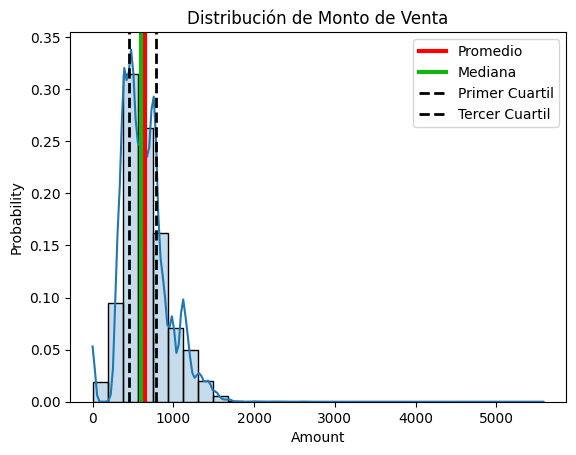

In [49]:
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

plt.figure()
sns.histplot(data = df,
             x = 'Amount',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')
 
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)

plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)

plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución de Monto de Venta')

/Users/Gerson/Library/Python/3.12/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Distribución de Monto transformado a Logaritmo')

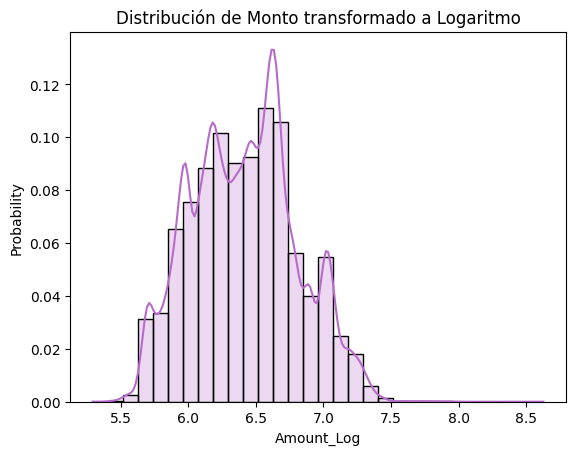

In [51]:
df['Amount_Log'] = np.log(df['Amount'])
plt.figure()
sns.histplot(data = df,
             x = 'Amount_Log',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de Monto transformado a Logaritmo')

In [15]:
ventas_categoria_producto = df['Category'].value_counts()
ventas_categoria_producto

Category
Set              47042
kurta            46717
Western Dress    14704
Top              10165
Ethnic Dress      1093
Blouse             881
Bottom             420
Saree              155
Dupatta              3
Name: count, dtype: int64

In [55]:

total_categoria = df.groupby('Category')['Amount'].sum().reset_index()
total_categoria.columns = ['Categoría de Producto', 'Monto Total']
total_categoria


,Categoría de Producto,Monto Total
0,Blouse,458408.18
1,Bottom,150667.98
2,Dupatta,915.00
3,Ethnic Dress,791217.66
4,Saree,123933.76
5,Set,39204124.03
6,Top,5347792.30
7,Western Dress,11216072.69
8,kurta,21299546.70
